# Use classification technique for prediction of Graduate Admissions from an Indian perspective

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Internship/Internsavy/Graduate Admissions/Admission_Predict.csv')

In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(400, 9)

In [ ]:
df = df.drop('Serial No.', axis=1)

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 1
Research             0
Chance of Admit      2
dtype: int64

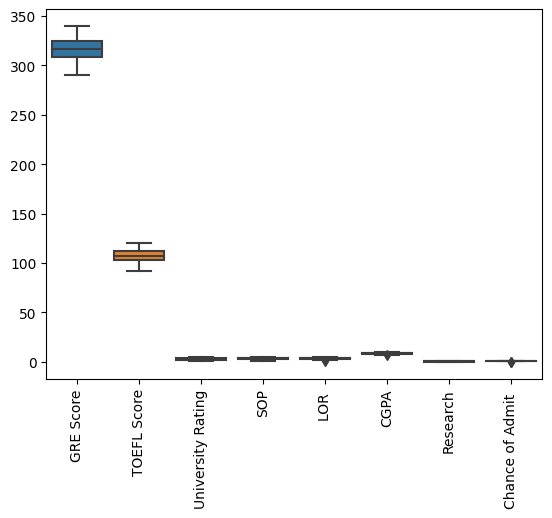

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(data=df)
plt.show()

In [ ]:
df.shape

(400, 8)

In [ ]:
lower_threshold = q1-(1.5*iqr)
lower_threshold

GRE Score            282.50000
TOEFL Score           89.50000
University Rating     -1.00000
SOP                    0.25000
LOR                    1.50000
CGPA                   6.83125
Research              -1.50000
Chance of Admit        0.35500
dtype: float64

In [ ]:
upper_threshold = q3+(1.5*iqr)
upper_threshold

GRE Score            350.50000
TOEFL Score          125.50000
University Rating      7.00000
SOP                    6.25000
LOR                    5.50000
CGPA                  10.40125
Research               2.50000
Chance of Admit        1.11500
dtype: float64

In [ ]:
df['LOR '].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [ ]:
df['LOR '].value_counts()

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR , dtype: int64

In [ ]:
df['LOR '] = df['LOR '].clip(1.5, 5.5)

In [ ]:
df['CGPA'] = df['CGPA'].clip(6.83125, 10.40125)

In [ ]:
df['Chance of Admit '] = df['Chance of Admit '].clip(0.35, 0.97, axis=0)

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      2
dtype: int64

In [ ]:
df1 = df.copy()
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.45375,8.599003,0.547500,0.724400
std,11.473646,6.069514,1.143728,1.006869,0.89540,0.596083,0.498362,0.142476
min,290.000000,92.000000,1.000000,1.000000,1.50000,6.831250,0.000000,0.350000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


<Axes: >

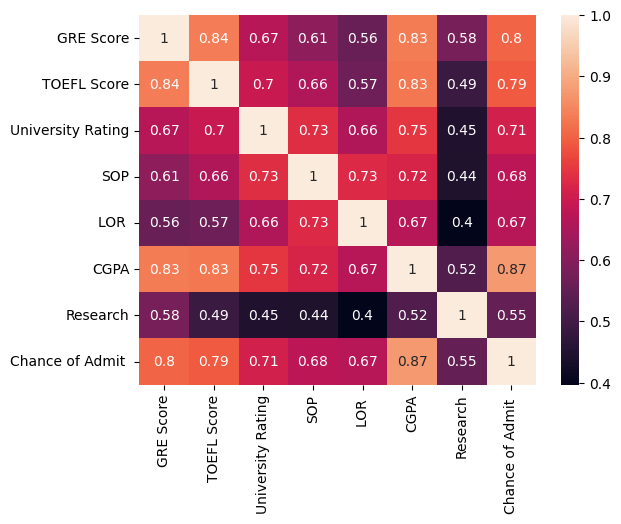

In [ ]:
sns.heatmap(data=df1.corr(), annot=True)

In [ ]:
df1.loc[df1['Chance of Admit ']>=0.70, 'Chance of Admit '] = 1
df1.loc[df1['Chance of Admit ']<0.70, 'Chance of Admit '] = 0

In [ ]:
df1['Chance of Admit '] = df1['Chance of Admit '].astype('int')

In [ ]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [ ]:
X = df1.drop('Chance of Admit ', axis=1)
y = df1['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280,), (120,))

In [ ]:
# ss = StandardScaler()

# ss.fit_transform(X_train, y_train)
# X_train = ss.transform(X_train)
# X_test = ss.transform(X_test)

In [ ]:
# ss = StandardScaler()
# ss.fit_transform(y_train, y_testest)
# y_train = ss.transform(y_train)
# y_test = ss.transform(y_test)

### Logistic Regression


In [ ]:
log_reg = LogisticRegression(solver='liblinear', random_state=33)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

## Difference b/t true value and predicted value

In [ ]:
a = {'Original value':y_test, 'Predicted Value': y_pred}
aa = pd.DataFrame(a)
aa

,Original value,Predicted Value
239,0,0
322,1,0
375,0,0
90,0,0
70,1,1
...,...,...
183,1,1
311,1,1
372,1,1
377,0,0


In [ ]:
accuracy_test_set = log_reg.score(X_test, y_test)
accuracy_test_set

0.8

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[39, 16],
       [ 8, 57]])

Test Confusion matrix


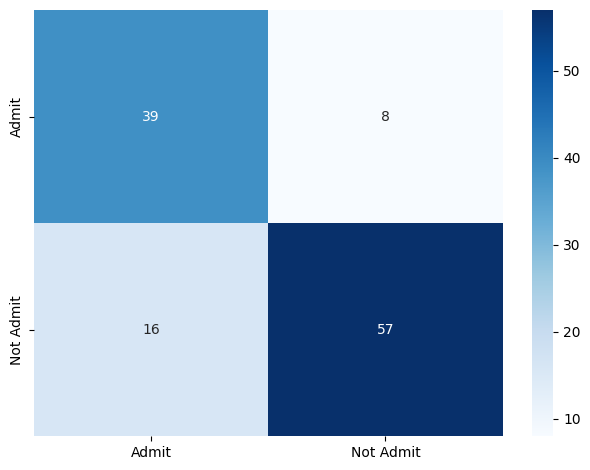

In [ ]:
classes = ['Admit','Not Admit']

# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

plot_confusionmatrix(y_pred,y_test,dom='Test')

In [ ]:
reports = classification_report(y_test, y_pred)
print(reports)

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        55
           1       0.78      0.88      0.83        65

    accuracy                           0.80       120
   macro avg       0.81      0.79      0.80       120
weighted avg       0.80      0.80      0.80       120



# Plotting AUC-ROC

In [ ]:
roc_auc_score(y_test, y_pred)

0.7930069930069931

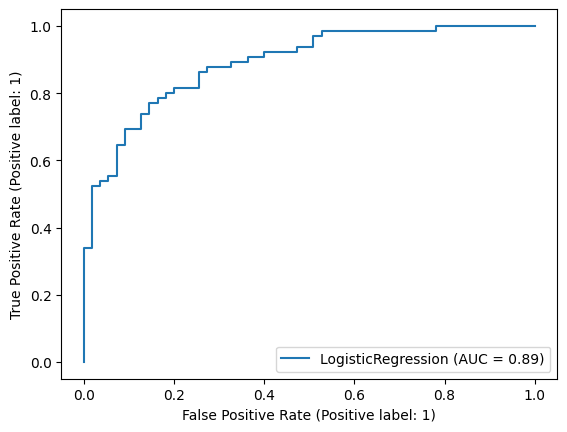

In [ ]:
#we compute the eval metric on test/validation set only primarily

RocCurveDisplay.from_estimator(log_reg, X_test, y_test)

### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=15)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
tree_cnf_matrix = confusion_matrix(y_test, dt_pred)
tree_cnf_matrix

array([[39, 16],
       [13, 52]])

Test Confusion matrix


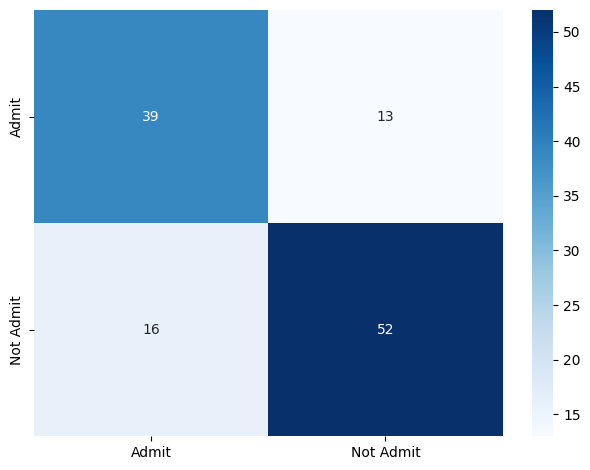

In [ ]:
classes = ['Admit','Not Admit']

# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

plot_confusionmatrix(dt_pred,y_test,dom='Test')

In [ ]:
tree_report = classification_report(y_test, dt_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        55
           1       0.76      0.80      0.78        65

    accuracy                           0.76       120
   macro avg       0.76      0.75      0.76       120
weighted avg       0.76      0.76      0.76       120



In [ ]:
roc_auc_score(y_test, dt_pred)

0.7545454545454545

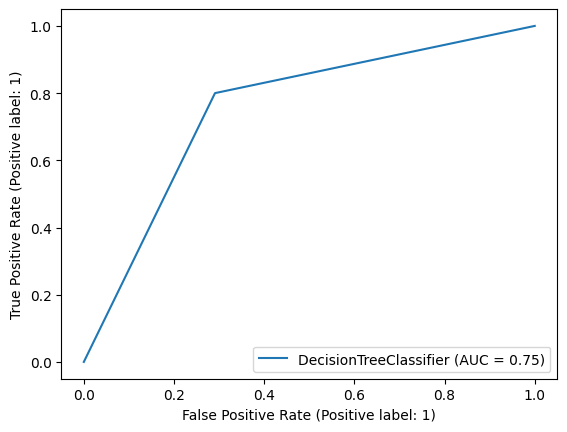

In [ ]:
RocCurveDisplay.from_estimator(dt, X_test, y_test)

### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=33)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [ ]:
rfc_cnf_matrix = confusion_matrix(y_test, rfc_pred)
rfc_cnf_matrix

array([[42, 13],
       [16, 49]])

Test Confusion matrix


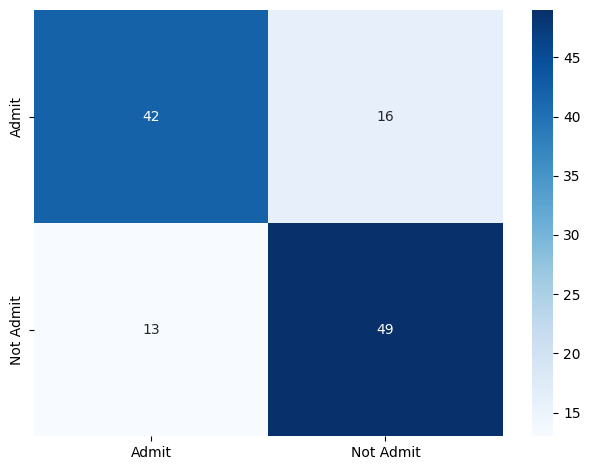

In [ ]:
classes = ['Admit','Not Admit']

# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

plot_confusionmatrix(rfc_pred,y_test,dom='Test')

In [ ]:
roc_auc_score(y_test, rfc_pred)

0.7587412587412588

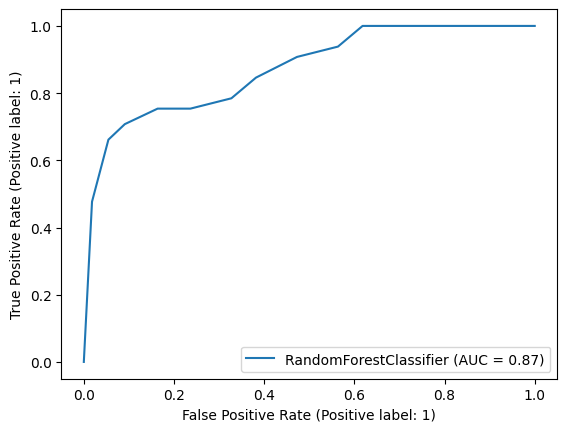

In [ ]:
RocCurveDisplay.from_estimator(rfc, X_test, y_test)

### XGBoost Classifier

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
xgbc_pred = xgbc.predict(X_test)

In [ ]:
xgbc_cnf_matrix = confusion_matrix(y_test, xgbc_pred)
xgbc_cnf_matrix

array([[41, 14],
       [13, 52]])

Test Confusion matrix


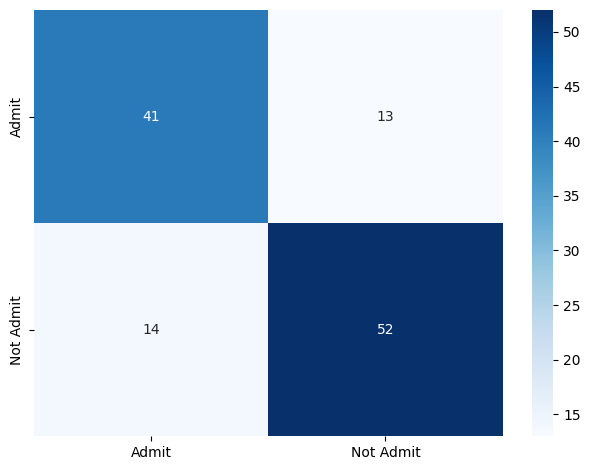

In [ ]:
classes = ['Admit','Not Admit']

# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

plot_confusionmatrix(xgbc_pred,y_test,dom='Test')

In [ ]:
print(classification_report(y_test, xgbc_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75        55
           1       0.79      0.80      0.79        65

    accuracy                           0.78       120
   macro avg       0.77      0.77      0.77       120
weighted avg       0.77      0.78      0.77       120



In [ ]:
roc_auc_score(y_test, xgbc_pred)

0.7727272727272727

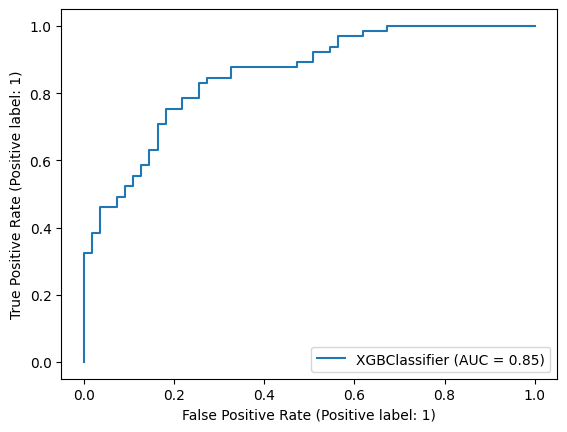

In [ ]:
RocCurveDisplay.from_estimator(xgbc, X_test, y_test)

In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

GRE Score            0.320231
CGPA                 0.213369
University Rating    0.166383
TOEFL Score          0.112562
LOR                  0.095824
SOP                  0.052899
Research             0.038731
dtype: float64

In [ ]:
# view the feature scores
feature_scores = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

GRE Score            0.493377
CGPA                 0.231429
TOEFL Score          0.095335
LOR                  0.066390
SOP                  0.041285
Research             0.040842
University Rating    0.031341
dtype: float64

In [ ]:
# view the feature scores
feature_scores = pd.Series(xgbc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

CGPA                 0.277631
GRE Score            0.237602
LOR                  0.128353
Research             0.098595
SOP                  0.092258
University Rating    0.086124
TOEFL Score          0.079436
dtype: float32

In [ ]:
models_list = []
models_list.append(('Logistic', LogisticRegression(solver='liblinear',random_state=33)))
models_list.append(('CART', DecisionTreeClassifier(criterion='gini' ,max_depth=15, random_state=33)))
models_list.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, random_state=33)))
models_list.append(('XGB Classifier', XGBClassifier(n_estimators=100, max_depth=15, random_state=33)))
models_list.append(('SVC', SVC(kernel='rbf',C=1.0,random_state=33)))

In [ ]:
models_list

[('Logistic', LogisticRegression(random_state=33, solver='liblinear')),
 ('CART', DecisionTreeClassifier(max_depth=15, random_state=33)),
 ('Random Forest Classifier',
  RandomForestClassifier(max_depth=15, random_state=33)),
 ('XGB Classifier',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
  kfold = KFold(n_splits=num_folds, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print(f'{name}: {cv_results.mean()} ({cv_results.std()})')


Logistic: 0.8035714285714286 (0.05813864498607037)
CART: 0.775 (0.0845908520166215)
Random Forest Classifier: 0.8392857142857144 (0.08784552768749175)
XGB Classifier: 0.8178571428571428 (0.0789762299553428)
SVC: 0.65 (0.07626484465736652)


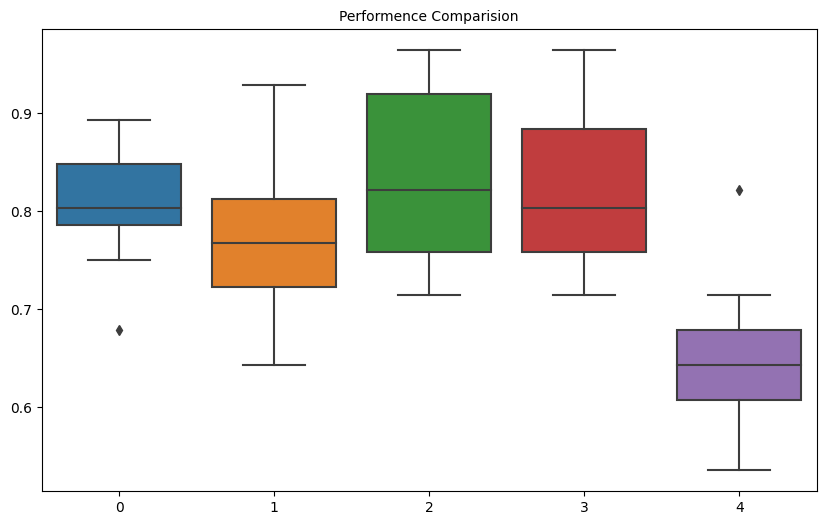

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Performence Comparision', fontsize=10)
sns.boxplot(data=results)
plt.show()

## Comparing with all models, we've a best results in Random Forest Classifier gives the good score. So we've to go with that model.